In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sl

import seaborn as sns; sns.set()
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
%matplotlib inline

### Tarea 3: Encuentre la regresión
Ud recibe unos datos $x$ y $y$ cómo se muestran a continuación. Ud debe responder cuatro preguntas a partir de estos datos. Suponga que ud tiene un modelo tal que $y=f(x)$ más aún desconoce $f$.

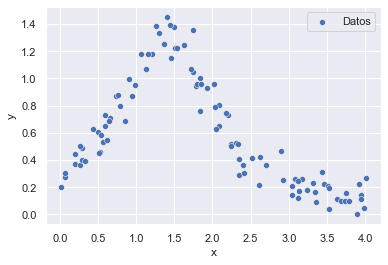

,x,y
0,0.065859,0.277413
1,0.020931,0.202239
2,0.070312,0.307369
3,0.206166,0.367530
4,0.286572,0.491144
...,...,...
95,3.922613,0.225565
96,3.898473,0.000000
97,3.952111,0.141005
98,3.939211,0.115500


In [2]:
df = pd.read_pickle(r"ex1.gz")
sns.scatterplot(x ='x',y ='y',data=df, label = "Datos")
plt.legend(loc="upper right")
plt.show()
df

## (A) Pendiente e intercepto
Determine la pendiente de los datos en el intervalo $[0,1.5]$ y el valor del intercepto con el eje $y$. Es decir, $f(0)=?$. ¿Cuál es el valor de $r^2$?

In [3]:
lx = df["x"]
ly = df["y"]

In [4]:
xt = []
yt = []
for i in range(len(lx)):
    if(0 <= lx[i] <= 1.5):
        xt.append(lx[i])
        yt.append(ly[i])

In [5]:
x = np.array(xt)
y = np.array(yt)

In [6]:
n = len(x)
sumx = sum(x)
sumy = sum(y)
sumxy = sum(x*y)
sumx2 = sum(x**2)
sumy2 = sum(y**2)
promx = sumx/n
promy = sumy/n

In [7]:
m = (sumx*sumy-(n*sumxy))/(sumx**2-(n*sumx2))
b = promy - m*promx

m, b

(0.816386961533224, 0.1827069085550168)

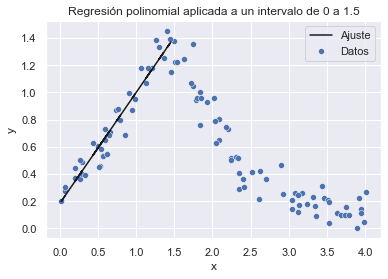

In [8]:
sns.scatterplot(x='x',y='y',data=df, label = "Datos")
plt.plot(x, m*x + b, color = "k", label = "Ajuste")
plt.legend(loc="upper right")
plt.title("Regresión polinomial aplicada a un intervalo de 0 a 1.5")
plt.show()

In [9]:
sigmax = np.sqrt((sumx2/n) - promx**2)
sigmay = np.sqrt(sumy2/n - promy**2)
covar = (sumxy/n) - (promx*promy)
r2 = (covar/(sigmax*sigmay))**2

In [10]:
r2

0.9316416262309265

$m = 0.816386961533224,$ $f(0)=0.1827069085550168$, $r^2 = 0.9316416262309265,$

### Comentario:
 
Se puede ver que ese es un modelo que se ajusta muy bien a este intervalo de datos, ya que su $r^2$ fue muy cercano a 1. 

## (B) Regresión polinomial
Suponga que quiere realizar la siguiente regresión polinomial:$$y=\beta+\beta_1x+\beta_2x^2+\beta_2x^3+\beta_2x^4+\beta_2x^5.$$
Plantee la función de costo que le permita calcular los coeficientes y calcule $\beta_1$, $\beta_2$, $\beta_3$, $\beta_4$, y $\beta_5$. ¿Cuál es el $r^2$?

Calcule $f(0)$ y compare con los resultados anteriores

In [11]:
A = []
for i in range(len(lx)):
    A.append([1, lx[i], lx[i]**2, lx[i]**3, lx[i]**4, lx[i]**5])

Mbgorro = np.matrix(A)

b = np.array([ly]).reshape(-1,1)

Mb = np.matrix(b)

## Función de costo:
Algoritmo de Optimización por Newton Raphson

In [12]:
def L(k,Mbgorro,Mb):
    
    m,n = Mbgorro.shape
    X = np.matrix(k).T
    DeltaB=(Mbgorro*X - Mb) # bgorro - b
    return (DeltaB.T*DeltaB)[0,0]/m # matriz 1x1

def dLdx(k,Mbgorro,Mb): # gradiente de L
    
    m,n = Mbgorro.shape
    X = np.matrix(k).T
    DeltaB=(Mbgorro*X - Mb) 
    return (2/m)*np.array(Mbgorro.T*DeltaB).flatten() 

e = 1e-10

In [13]:
res1 = sp.optimize.minimize(fun=L,x0=np.zeros(Mbgorro.shape[1]), args = (Mbgorro,Mb), tol=1e-10)
res1['x']

array([ 0.35735803, -0.84260309,  3.78478572, -3.00338579,  0.85844424,
       -0.08305811])

$f(0)$ =  0.35735768,
$\beta_1$ = -0.84260174,
$\beta_2$ = 3.78478429,
$\beta_3$ = -3.00338516,
$\beta_4$ =  0.85844412,
$\beta_5$ = -0.08305811

In [14]:
L(res1['x'],Mbgorro,Mb)

0.012550626817337412

#### Valor de la función de costo
$L = 0.012550626817337412$

In [15]:
k =  np.linspace(0,4,100)

def Poli(c5,c4,c3,c2,c1,b,x):
    return  b +  c1*x +c2*(x**2) + c3*(x**3)+ c4*(x**4) +c5*(x**5) 

In [16]:
pre = Poli(res1['x'][5],res1['x'][4],res1['x'][3],res1['x'][2],res1['x'][1],res1['x'][0],k)

In [17]:
r2 = 1-np.sum((pre - ly)**2)/np.sum((ly-ly.mean())**2)
r2

0.9111078914676154

$r^2 = 0.9111078914676154$, $f(0)= 0.3573580251551316$

### Comentario: 

Se puede ver que este modelo se ajusta muy bien al intérvalo completo de datos, ya que su $r^2$ fue muy cercano a 1. Comparándolo con el $r^2$ anterior, que igual a 0.9316416262309265 se ve que dieron muy parecidos. Igualmente, el intercepto anterior, que fue de 0.1827069085550168, también dio muy parecido a este intercepto.

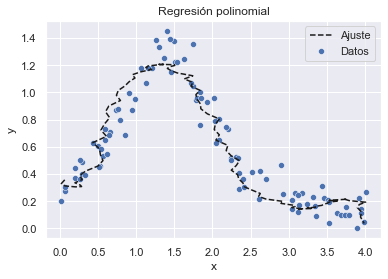

In [18]:
sns.scatterplot(x ='x',y ='y',data=df, label = "Datos")
plt.plot(lx,pre,"--", color='k', label = "Ajuste")
plt.title("Regresión polinomial")
plt.legend(loc="upper right")


## (C) Regresión polinomial exacta

Resulta, que cuando se quiere hacer alguna regresión polinomial esta se puede hacer de forma exacta. ¿Cómo? Suponga que ud va a considerar que su problema en lugar de tener $1$ variable ($x$) tiene $n+1$, siendo $n$ el orden del polinomio a ajustar. Es decir, sus nuevas variables van a ser $\{x_0,\,x_1,\,x_2,\,x_3,\dots,\,x_n\}$ definiendo $x_j=x^j$. Así pues, siguiendo el mismo procedimiento para la regresión lineal multidimensional que realizamos para el ejercicio de datos inmobiliarios, puede encontrar los valores de los coeficientes $\beta_1$, $\beta_2$, $\beta_3$, $\beta_4$, y $\beta_5$. Encuentre estos valores y compare con los resultados en la sección (B).

Calcule $f(0)$ y compare con los resultados anteriores.

Si ud se pregunta si esto es posible la respuesta es sí. Inclusive, esto se puede extender a cualquier a cualquier conjunto de funciones, tal que $x_j=f_j(x)$, que represente un conjunto "linealmente independiente" (¡Me estoy adelantando a Fourier!). Para quienes quieran explorar algunas curiosidades matemáticas, cuando $n+1$ es igual al número de puntos o valores de $x$ (y todos diferentes) la matriz es siempre invertible y resulta ser la inversa de una matriz de Vandermonde.

In [19]:
lx = df["x"]
ly = df["y"]

In [20]:
X = np.array(lx).reshape(-1, 1)
Y = np.array(ly).reshape(-1, 1)

P = np.array([np.ones([len(lx), 1]), X, X**2, X**3, X**4, X**5]).reshape(6, len(lx)).T
coeffs = np.linalg.inv(P.T @ P) @ P.T @ Y

In [21]:
b, c1, c2, c3, c4, c5 = coeffs

In [22]:
coeffs

array([[ 0.35644669],
       [-0.83588269],
       [ 3.77276401],
       [-2.99526012],
       [ 0.85614705],
       [-0.08282854]])

In [23]:
Ajuste = b + (c1*X) + (c2*X**2) + (c3*X**3) +  (c4*X**4) + (c5*X**5)

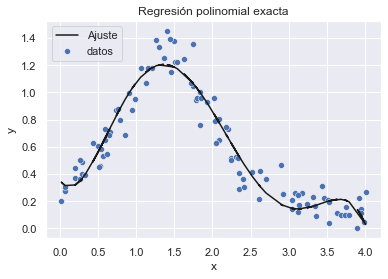

In [24]:
plt.figure()
sns.scatterplot(x='x',y='y',data = df, label = "datos")
plt.plot(X, Ajuste, c ='k', label = "Ajuste")
plt.legend(loc="upper left")
plt.title("Regresión polinomial exacta")
plt.ylabel('y')
plt.xlabel('x')
plt.show()

In [25]:
prediccion = np.array(P@coeffs).flatten()
observacion = np.array(Y).flatten()
k = observacion.mean()

In [26]:
r2 = 1 - (np.linalg.norm(prediccion - observacion)**2)/(np.linalg.norm(observacion - k)**2)

In [27]:
r2, b

(0.9199225041318263, array([0.35644669]))

$r^2 = 0.9199225041318263,$ $f(0)=0.35644669$


### Comentario: 

Se puede ver que este modelo se ajusta muy bien al intérvalo completo de datos, al igual que el anterior, incluso los valores son muy similares muy cercanos a 1. Igualmente, su intercepto anterior, que fue de 0.3573580251551316, también dio muy parecido a este intercepto, sus valores son casi iguales. 

## (D) Regresión a un modelo teórico
Suponga que su modelo teórico es el siguiente:$$y=\frac{a}{\left[(x-b)^2+c\right]^\gamma}.$$Halle $a$, $b$, $c$ y $\gamma$.

Calcule $f(0)$ y compare con los resultados anteriores

In [28]:
def f(parametro,x):  # parametros es un vector de 3 componentes
    return (parametro[0])/((x-parametro[1])**2 + parametro[2])**parametro[3]

def Lfit(parametro,x,y): # funcion de costo MSE (No es la mejor!)
    # L = promedio sobre todos los puntos (f(a,b,c;x)-y)^2
    # parametros np.array([a,b,c])
    deltaY = f(parametro,x) - y
    return np.dot(deltaY,deltaY)/len(y)
e = 1e-8

In [29]:
res2 = sp.optimize.minimize(fun=Lfit, x0=np.array([0,1,0,0]), args = (x,y), method='L-BFGS-B', tol=e)

In [30]:
res2["x"]

array([0.94519587, 1.43859817, 0.7390972 , 1.12724243])

 $a =0.94519587,$ $b = 1.43859817,$ $c = 0.7390972,$ $\gamma = 1.12724243$.

In [31]:
pre2 = f(res2.x,lx)

In [32]:
b = f(res2.x,0)
b

0.2950897972713322

$f(0)=0.2950897972713322$

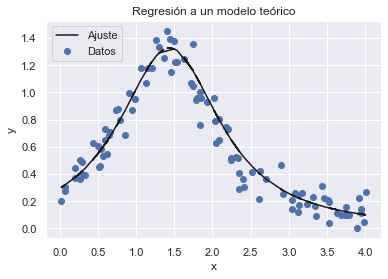

In [33]:
plt.figure()
plt.scatter(lx,ly, label = "Datos")
plt.plot(lx,pre2, c = 'k', label = "Ajuste")
plt.legend(loc="upper left")
plt.title("Regresión a un modelo teórico")
plt.ylabel('y')
plt.xlabel('x')
plt.show()

Al comparar este intercepto con los dos anteriores, aplicado al rango completo de datos, se puede ver que son muy similares, ya que todos dieron 0,3 aproximadamente. Cada modelo se ajustó muy bien a los datos, como es mostrado en las gráficas y en los $r^2$, cuyo valor, mientras más cercano a uno, más acertado es el modelo de regresión. De esto se deduce que existen infinitos modelos para correlacionar variables y que hay que observar cuál es el que mejor se ajusta  a través de la comparación de estos. 